# **Experiment 6**

In [2]:
!pip install factor_analyzer

     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.8 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 417.7 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42625 sha256=f96b12918aad38b24c11b1930908a688e2e5e34d479bf3ffc0d4dd27aa710ca7
  Stored in directory: c:\users\kartik\appdata\local\pip\cache\wheels\fa\f7\53\a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


Factor Analysis (FA) is an exploratory data analysis method used to search influential underlying factors or latent variables from a set of observed variables. It helps in data interpretations by reducing the number of variables. It extracts maximum common variance from all variables and puts them into a common score.

Factor analysis is widely utilized in market research, advertising, psychology, finance, and operation research. Market researchers use factor analysis to identify price-sensitive customers, identify brand features that influence consumer choice, and helps in understanding channel selection criteria for the distribution channel.




Let's perform factor analysis on BFI (dataset based on personality assessment project), which were collected using a 6 point response scale: 1 Very Inaccurate, 2 Moderately Inaccurate, 3 Slightly Inaccurate 4 Slightly Accurate, 5 Moderately Accurate, and 6 Very Accurate. You can also download this dataset from the following the link: https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [3]:
import pandas as pd
from pandas import read_csv, Series, DataFrame
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

df = read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv")
df.columns



Index(['rownames', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2',
       'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [4]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

# Dropping missing values rows
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  2436 non-null   int64  
 1   A1        2436 non-null   float64
 2   A2        2436 non-null   float64
 3   A3        2436 non-null   float64
 4   A4        2436 non-null   float64
 5   A5        2436 non-null   float64
 6   C1        2436 non-null   float64
 7   C2        2436 non-null   float64
 8   C3        2436 non-null   float64
 9   C4        2436 non-null   float64
 10  C5        2436 non-null   float64
 11  E1        2436 non-null   float64
 12  E2        2436 non-null   float64
 13  E3        2436 non-null   float64
 14  E4        2436 non-null   float64
 15  E5        2436 non-null   float64
 16  N1        2436 non-null   float64
 17  N2        2436 non-null   float64
 18  N3        2436 non-null   float64
 19  N4        2436 non-null   float64
 20  N5        2436 non-null   float64
 

In [5]:
df.head()

,rownames,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [6]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18184.30630782113, 0.0)

In [9]:
# Create factor analysis object and perform factor analysis


from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
(18184.306307821134, 0.0)
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)  #Analyze (Also varimax rotation)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
       1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
       0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
       0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
       0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
       0.2622634 ])

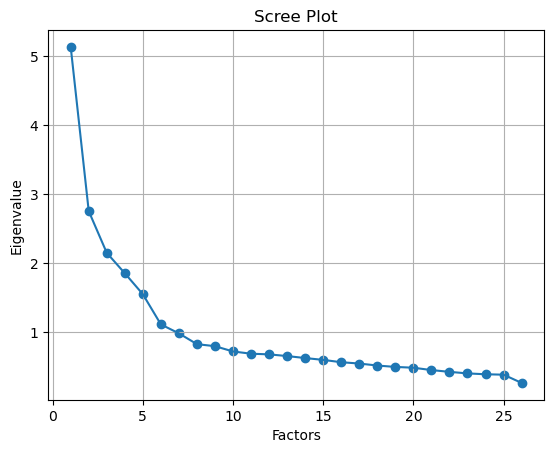

In [10]:
# Create factor analysis object and perform factor analysis
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [11]:
loadings = fa.loadings_
loadings


array([[-0.07131035, -0.01751926,  0.05405798],
       [-0.23219058,  0.08334477,  0.03458871],
       [ 0.5413533 ,  0.06211685,  0.04667964],
       [ 0.64586903,  0.04331579,  0.00192803],
       [ 0.3910012 , -0.0592843 ,  0.07552545],
       [ 0.64743433, -0.08504573, -0.01610074],
       [-0.012761  ,  0.08019221,  0.61189812],
       [-0.00668553,  0.14317342,  0.63664786],
       [-0.00354385, -0.00201999,  0.48602329],
       [ 0.05511348,  0.18756638, -0.63069868],
       [-0.05185813,  0.26189667, -0.46496583],
       [-0.53560024,  0.02486522,  0.09320605],
       [-0.57445533,  0.2160911 , -0.01194908],
       [ 0.6069387 ,  0.09092885,  0.0968013 ],
       [ 0.69550544, -0.10590157, -0.06884823],
       [ 0.4264341 ,  0.09512995,  0.30777364],
       [ 0.00397076,  0.74125646, -0.06354794],
       [-0.02255664,  0.74077167, -0.01052292],
       [ 0.01980718,  0.74281972, -0.04895261],
       [-0.1871232 ,  0.58791351, -0.08352484],
       [-0.0122797 ,  0.50640963, -0.094

# **Example for Practice**

Try to add 'varimax' rotation in fa.fit or fa.analyze. (Write your code in below code tab)

In [ ]:
fa1 = FactorAnalyzer(rotation="varimax")  
fa1.fit(df)

# **Example 2**

Choose any other dataset from the given website and apply factor analysis on that data.


In [12]:


df = read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv")
df.columns


Index(['rownames', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2',
       'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [13]:
# Drop unnecessary columns  
df.drop(['gender', 'education', 'age'], axis=1, inplace=True)  

In [14]:
# Drop rows with missing values  
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  2436 non-null   int64  
 1   A1        2436 non-null   float64
 2   A2        2436 non-null   float64
 3   A3        2436 non-null   float64
 4   A4        2436 non-null   float64
 5   A5        2436 non-null   float64
 6   C1        2436 non-null   float64
 7   C2        2436 non-null   float64
 8   C3        2436 non-null   float64
 9   C4        2436 non-null   float64
 10  C5        2436 non-null   float64
 11  E1        2436 non-null   float64
 12  E2        2436 non-null   float64
 13  E3        2436 non-null   float64
 14  E4        2436 non-null   float64
 15  E5        2436 non-null   float64
 16  N1        2436 non-null   float64
 17  N2        2436 non-null   float64
 18  N3        2436 non-null   float64
 19  N4        2436 non-null   float64
 20  N5        2436 non-null   float64
 

In [15]:
# Check Bartlett's test to confirm suitability for factor analysis  
chi_square_value, p_value = calculate_bartlett_sphericity(df)  
print('Bartlett’s Test: Chi-square =', chi_square_value, ', p-value =', p_value)  

Bartlett’s Test: Chi-square = 18184.30630782113 , p-value = 0.0


In [16]:
# Create factor analysis object and fit the model  
fa = FactorAnalyzer(n_factors=5, rotation='varimax')  # Change n_factors as needed  
fa.fit(df)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [17]:
# Check Eigenvalues  
ev, v = fa.get_eigenvalues()

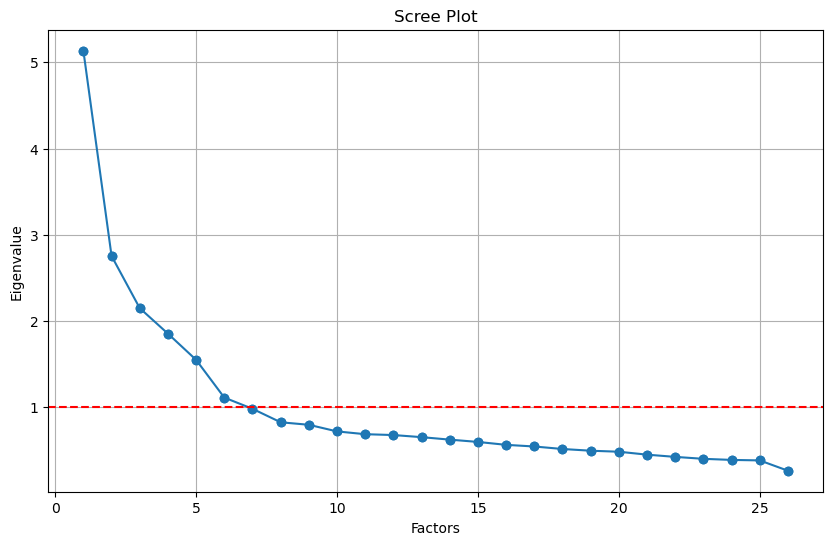

In [18]:
# Scree plot  
plt.figure(figsize=(10, 6))  
plt.scatter(range(1, df.shape[1] + 1), ev)  
plt.plot(range(1, df.shape[1] + 1), ev, marker='o')  
plt.title('Scree Plot')  
plt.xlabel('Factors')  
plt.ylabel('Eigenvalue')  
plt.grid()  
plt.axhline(y=1, color='r', linestyle='--')  # Kaiser Criterion  
plt.show()  

In [19]:
# Loadings matrix  
loadings = fa.loadings_  
print("Factor Loadings:\n", loadings)  



Factor Loadings:
 [[-0.01924556 -0.06170286  0.03486479 -0.01867751  0.0143449 ]
 [ 0.1064546   0.0307053   0.02756748 -0.42961248 -0.07413314]
 [ 0.02869339  0.22712712  0.14115892  0.62180104  0.0641174 ]
 [ 0.0053354   0.32992706  0.11592822  0.64285597  0.06164725]
 [-0.06944324  0.2092169   0.23541803  0.43124101 -0.1086474 ]
 [-0.12900241  0.39769001  0.09790092  0.52815947  0.0753634 ]
 [ 0.00954751  0.04829695  0.54827569  0.04119434  0.21216878]
 [ 0.08997526  0.01445863  0.65030388  0.10569283  0.11658219]
 [-0.03024319  0.01082522  0.55578126  0.11416497 -0.00481157]
 [ 0.24079401 -0.03932582 -0.63357583 -0.04146169 -0.1096952 ]
 [ 0.29433007 -0.15417946 -0.56699105 -0.04785845  0.03126425]
 [ 0.05706633 -0.57646013  0.01718243 -0.08965972 -0.07321838]
 [ 0.2616608  -0.67156053 -0.12149036 -0.09678777 -0.05968008]
 [ 0.01241719  0.53305616  0.09762393  0.24574113  0.29388278]
 [-0.13102573  0.64875005  0.12049501  0.29006877 -0.05698468]
 [ 0.02432691  0.49253433  0.32663881

In [20]:
# Optional: Retrieve and check the explained variance  
variance = fa.get_factor_variance()  
print("Variance Explained by Factors:\n", variance)  

Variance Explained by Factors:
 (array([2.73610909, 2.42804922, 2.08250384, 1.80050522, 1.54950195]), array([0.10523497, 0.09338651, 0.0800963 , 0.0692502 , 0.05959623]), array([0.10523497, 0.19862147, 0.27871777, 0.34796798, 0.4075642 ]))
